In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import requests
import json
from pprint import pprint
import re as re
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from sqlalchemy import create_engine


In [ ]:
#pip install psycopg2

In [ ]:
# In this project i will be using .csv and the two required methods of data pull (API call and web scraping)
#populating current application list in github
    #url = "https://jobs.github.com/positions.json?description=api"
#Job aplication list from .csv file in Kaggle, only for Data Analytics
    #data_df = pd.read_csv('../resources/DataAnalyst1.csv')
#Webscraping from greatplacetowork to get the list of companies in the top 100
   #url = 'https://www.greatplacetowork.com/best-workplaces/100-best/2021'

In [2]:
#Resource #1 - importing the CSVfile
#CSV file https://www.kaggle.com/andrewmvd/data-analyst-jobs
data_df = pd.read_csv('../resources/DataAnalyst1.csv')
#checked the number of records 
#print(len(New_data))

In [3]:
#indexing the table
data_df.index
data_df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


In [4]:
#droping colums which will not be used  
New_data=data_df.drop(['Unnamed: 0'], axis=1)
#renaming company name and removing the rating description from the company name 
New_data.rename(columns={'Company Name':'Company'}, inplace=True)
New_data[['Company Name','rate']] = New_data.Company.str.split("\n",expand=True,)

#cleaning salary
New_data["Salary Estimate"] = New_data["Salary Estimate"].str.replace("\(Glassdoor est.\)", "")
New_data["Salary Estimate"] = New_data["Salary Estimate"].str.replace("K", "")
New_data.rename(columns={'Salary Estimate':'Salary_estimate'}, inplace=True)
New_data[['Min','Max']] =New_data.Salary_estimate.str.split("-",expand=True,)

#cleaning Job description 
New_data["Job Description"] = New_data["Job Description"].str.replace("\n", " ")
New_data["Job Description"] = New_data["Job Description"].str.replace("\n\n", ".")

#Cleaning Location 
New_data[['City','State', 'none']] =New_data.Location.str.split(",",n=2,expand=True,)
#New_data.dtypes
New_data.head(4)

,Job Title,Salary_estimate,Job Description,Rating,Company,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,Easy Apply,Company Name,rate,Min,Max,City,State,none
0,"Data Analyst, Center on Immigration and Justic...",$37-$66,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,$100 to $500 million (USD),-1,TRUE,Vera Institute of Justice,3.2,$37,$66,New York,NY,None
1,Quality Data Analyst,$37-$66,Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,...,$2 to $5 billion (USD),-1,-1,Visiting Nurse Service of New York,3.8,$37,$66,New York,NY,None
2,"Senior Data Analyst, Insights & Analytics Team...",$37-$66,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,...,Unknown / Non-Applicable,GoDaddy,-1,Squarespace,3.4,$37,$66,New York,NY,None
3,Data Analyst,$37-$66,Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,...,$50 to $100 million (USD),-1,-1,Celerity,4.1,$37,$66,New York,NY,None


In [5]:
#Demand for Data Analytics per Company 
Company = New_data.groupby("Company Name").count()
Company[["Job Title"]].sort_values(by = "Job Title", ascending = False)

,Job Title
Company Name,
"Staffigo Technical Services, LLC",58
Diverse Lynx,22
Lorven Technologies Inc,19
Kforce,19
Robert Half,14
...,...
HCL Technologies Ltd.,1
HCL Global Systems,1
HCL America Inc.,1


In [6]:
#creating job posting table 
Job_Posting_Job = pd.DataFrame(New_data, columns = ['Job Title','Job Description'])
Job_Posting_comp = pd.DataFrame(New_data, columns = ['Job Title','Company Name','Min','Max', 'City', 'State'])
Job_Posting_comp.head(4)

,Job Title,Company Name,Min,Max,City,State
0,"Data Analyst, Center on Immigration and Justic...",Vera Institute of Justice,$37,$66,New York,NY
1,Quality Data Analyst,Visiting Nurse Service of New York,$37,$66,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",Squarespace,$37,$66,New York,NY
3,Data Analyst,Celerity,$37,$66,New York,NY


In [7]:
#Demand for Data Analytics per state
Job_Posting_loc = Job_Posting_comp.groupby("State").count()
Job_Posting_loc[["Job Title"]].sort_values(by = "Job Title", ascending = False)

,Job Title
State,
CA,626
TX,394
NY,345
IL,164
PA,114
AZ,97
NC,90
CO,88
NJ,86


In [8]:
#Demand for Data Analytics per Sector
Sector_loc = New_data.groupby("Sector").count()
Sector_loc[["Job Title"]].sort_values(by = "Job Title", ascending = False)

,Job Title
Sector,
Information Technology,570
Business Services,524
-1,353
Finance,169
Health Care,151
Education,52
Insurance,51
Accounting & Legal,43
Media,42


In [9]:
#Demand for Data Analytics per state
company_CSV = pd.DataFrame(New_data, columns = ['Company Name','Headquarters', 'Size', 'Founded','Type of ownership','Industry','Sector','Revenue'])
company_CSV.head()

,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Vera Institute of Justice,"New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Visiting Nurse Service of New York,"New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,Squarespace,"New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,Celerity,"McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,FanDuel,"New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)


In [10]:
#Creating a table for Company competition
company_compe = pd.DataFrame(New_data, columns = ['Company Name', 'Competitors', 'Easy Apply'])
company_compe.head()


,Company Name,Competitors,Easy Apply
0,Vera Institute of Justice,-1,TRUE
1,Visiting Nurse Service of New York,-1,-1
2,Squarespace,GoDaddy,-1
3,Celerity,-1,-1
4,FanDuel,DraftKings,TRUE


In [11]:
for column in company_compe.columns:
    company_compe[column].replace({"-1": " "}, inplace=True)
company_compe.head()

,Company Name,Competitors,Easy Apply
0,Vera Institute of Justice,,TRUE
1,Visiting Nurse Service of New York,,
2,Squarespace,GoDaddy,
3,Celerity,,
4,FanDuel,DraftKings,TRUE


In [12]:
#populating current application list in github
url = "https://jobs.github.com/positions.json?description=api"

In [13]:
response = requests.get(url).json()
pprint(response)

[{'company': '  EngagedMD - a healthtech company',
  'company_logo': 'https://jobs.github.com/rails/active_storage/blobs/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBBaGFpIiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--d47d51b7a25aedf4ae15250198279794a7e84db4/Screen%20Shot%202021-04-27%20at%2012.26.30%20AM.png',
  'company_url': None,
  'created_at': 'Tue Apr 27 04:28:04 UTC 2021',
  'description': '<h3>For fastest response, apply on our site:</h3>\n'
                 '<p><a '
                 'href="https://engaged-md.com/careers/#openings">https://engaged-md.com/careers/#openings</a></p>\n'
                 '<p><strong>Role:</strong></p>\n'
                 '<p><strong>We’re looking for an experienced backend '
                 'developer capable of contributing to the backend build of '
                 'our next generation microservice-based platform.</strong> '
                 'You’ll be responsible for architecting back-end cloud '
                 'infrastructure, our applications middleware l

                 '<li>Statistics, deep learning</li>\n'
                 '</ul>\n'
                 '<p>Benefits:</p>\n'
                 '<ul>\n'
                 '<li>Remote work</li>\n'
                 '<li>Flexible hours</li>\n'
                 '<li>Health, dental and vision insurance plans</li>\n'
                 '<li>Additional vacation days</li>\n'
                 '</ul>\n'
                 '<p>PARKNAV is an equal opportunity employer.</p>\n'
                 '<p>We look forward to meeting you!</p>\n',
  'how_to_apply': '<p>Email your application to <a '
                  'href="mailto:careers@parknav.com">careers@parknav.com</a></p>\n',
  'id': 'a1553ed1-f9c8-478e-9e61-f5330efc8a78',
  'location': 'North America/Europe/Israel (Remote)',
  'title': 'Senior Java Backend Engineer',
  'type': 'Full Time',
  'url': 'https://jobs.github.com/positions/a1553ed1-f9c8-478e-9e61-f5330efc8a78'},
 {'company': 'DÜRR DENTAL SE ',
  'company_logo': 'https://jobs.github.com/rails/active_sto

  'description': '<h2>The short version</h2>\n'
                 '<p>Early-stage venture-backed startup looking for a software '
                 'engineer to use Python, Javascript, and HTML/CSS to help '
                 'build out our web platform. Good fit if you like moving '
                 'fast, having impact, and working on a variety of different '
                 'things.</p>\n'
                 '<h2>Who we are</h2>\n'
                 '<p>We’re a fast-moving startup with a vision to empower all '
                 'professionals by helping them build better relationships. '
                 'Our vision is to fix the network gap: the inequality of '
                 'opportunity driven by not having the right connections. To '
                 'solve this problem, we’re combining the best practices of '
                 'the world’s top relationship builders with artificial '
                 'intelligence.</p>\n'
                 '<p>We’re building a mission-driven team tha

                 'Penske Truck Leasing Co., L.P., headquartered in Reading, '
                 'Pennsylvania, is a partnership of Penske Corporation, Penske '
                 'Automotive Group, and Mitsui &amp; Co., Ltd. A leading '
                 'global transportation services provider, Penske operates a '
                 'premier fleet of vehicles and serves its customers from '
                 'locations in North America, South America, Europe, '
                 'Australia, and Asia. Penske’s product lines include '
                 'full-service truck leasing, contract maintenance, commercial '
                 'and consumer truck rentals, used truck sales, transportation '
                 'and warehousing management, and supply chain management '
                 'solutions. Visit <a '
                 'href="http://www.GoPenske.com">www.GoPenske.com</a> to learn '
                 'more.</p>\n',
  'how_to_apply': '<p>Click the link to apply: <a '
                  'href="

                 '<p>3+ years of professional experience</p>\n'
                 '<p>Project management skills</p>\n'
                 '<p>A keen attention to detail</p>\n'
                 '<p>Experience with system architecture or leading a software '
                 'team is a strong advantage</p>\n'
                 '<p>Full-time availability is a strong advantage</p>\n'
                 '<p>If you’re interested in pursuing an engaging career '
                 'working on full-time freelance jobs for exclusive clients, '
                 'take the next step by clicking apply and filling out the '
                 'short form: <a '
                 'href="https://topt.al/v7cnRN">https://topt.al/v7cnRN</a></p>\n',
  'how_to_apply': '<p>Take the next step by clicking apply and filling out the '
                  'short form: <a '
                  'href="https://topt.al/v7cnRN">https://topt.al/v7cnRN</a></p>\n',
  'id': '224f07bf-655d-4359-ac7f-5eb2a96aa661',
  'location': 'Remote',

In [14]:
df=pd.DataFrame(response)
print(df.columns)

Index(['id', 'type', 'url', 'created_at', 'company', 'company_url', 'location',
       'title', 'description', 'how_to_apply', 'company_logo'],
      dtype='object')


In [15]:
print(len(df))

50


In [16]:
#df = pd.read_json('data')
df=df[['id','type', 'url', 'created_at', 'company', 'company_url', 'location',
       'title', 'description', 'how_to_apply', 'company_logo']]
df.head(1)

,id,type,url,created_at,company,company_url,location,title,description,how_to_apply,company_logo
0,e2d89383-d183-4efb-a900-79a49ec4957a,Full Time,https://jobs.github.com/positions/e2d89383-d18...,Tue Apr 27 04:28:04 UTC 2021,EngagedMD - a healthtech company,None,Remote,Senior Backend Developer (Node.JS),"<h3>For fastest response, apply on our site:</...","<p>For fastest response, apply on our site:\n<...",https://jobs.github.com/rails/active_storage/b...


In [17]:
#Renaming the coulmns i will be using
df.rename(columns={'company_url':'Company URL', 'type':'Type','location':'Location', 'title':'Title', 'description':'Description', 'company_logo':'Company_logo', 'company':'Company Name', 'url':'Application URL'}, inplace=True)
df.head(3)

,id,Type,Application URL,created_at,Company Name,Company URL,Location,Title,Description,how_to_apply,Company_logo
0,e2d89383-d183-4efb-a900-79a49ec4957a,Full Time,https://jobs.github.com/positions/e2d89383-d18...,Tue Apr 27 04:28:04 UTC 2021,EngagedMD - a healthtech company,None,Remote,Senior Backend Developer (Node.JS),"<h3>For fastest response, apply on our site:</...","<p>For fastest response, apply on our site:\n<...",https://jobs.github.com/rails/active_storage/b...
1,d0afa0c1-2ff5-4bb4-acc6-911eb06a2013,Contract,https://jobs.github.com/positions/d0afa0c1-2ff...,Mon Apr 26 15:33:08 UTC 2021,Fullstack,http:,Anywhere,React Native Engineer,<p><strong>React Native Mobile Engineer</stron...,<p>Complete the online application at <a href=...,https://jobs.github.com/rails/active_storage/b...
2,01e82177-cb13-4026-bbc3-c309765347e2,Full Time,https://jobs.github.com/positions/01e82177-cb1...,Mon Apr 26 12:50:24 UTC 2021,Kontist GmbH,https://kontist.com/home/?mrasn=702727.872066....,Berlin,Senior JavaScript Developer (f/m/x),<p>Do you know how many obstacles freelancers ...,"<p><a href=""https://kontist.join.com/jobs/2133...",https://jobs.github.com/rails/active_storage/b...


In [18]:
#Removing tags from columns with tags
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df['Description']= df['Description'].apply(lambda cw : remove_tags(cw))
df['how_to_apply']= df['how_to_apply'].apply(lambda cw : remove_tags(cw))
df['Location']= df['Location'].apply(lambda cw : remove_tags(cw))
df['Title']= df['Title'].apply(lambda cw : remove_tags(cw))

In [19]:
#seprating the data column
df[['Weekday','Month','date', 'hour','zone', 'year']] = df.created_at.str.split(" ",expand=True,)
df.head(1)

,id,Type,Application URL,created_at,Company Name,Company URL,Location,Title,Description,how_to_apply,Company_logo,Weekday,Month,date,hour,zone,year
0,e2d89383-d183-4efb-a900-79a49ec4957a,Full Time,https://jobs.github.com/positions/e2d89383-d18...,Tue Apr 27 04:28:04 UTC 2021,EngagedMD - a healthtech company,None,Remote,Senior Backend Developer (Node.JS),"For fastest response, apply on our site:\nhttp...","For fastest response, apply on our site:\nhttp...",https://jobs.github.com/rails/active_storage/b...,Tue,Apr,27,04:28:04,UTC,2021


In [20]:
#creating tables for company info
CompanyGit = pd.DataFrame(df, columns = ['Company Name', 'Location','Company URL', 'Company_logo'])
ApplicationGit=pd.DataFrame(df, columns = ['Title','Description','Type','Company Name','how_to_apply','Application URL'])
ApplicationGit_app=pd.DataFrame(df, columns = ['Title','Description'])
ApplicationGit.head(2)

,Title,Description,Type,Company Name,how_to_apply,Application URL
0,Senior Backend Developer (Node.JS),"For fastest response, apply on our site:\nhttp...",Full Time,EngagedMD - a healthtech company,"For fastest response, apply on our site:\nhttp...",https://jobs.github.com/positions/e2d89383-d18...
1,React Native Engineer,React Native Mobile Engineer\nFullstack is loo...,Contract,Fullstack,Complete the online application at https://gof...,https://jobs.github.com/positions/d0afa0c1-2ff...


In [21]:
ApplicationGitTime=pd.DataFrame(df, columns = ['Title','Company Name','Weekday','Month','date','hour','zone','year'])
ApplicationGitTime.head(2)

,Title,Company Name,Weekday,Month,date,hour,zone,year
0,Senior Backend Developer (Node.JS),EngagedMD - a healthtech company,Tue,Apr,27,04:28:04,UTC,2021
1,React Native Engineer,Fullstack,Mon,Apr,26,15:33:08,UTC,2021


In [22]:
#Demand for Data Analytics per Sector
Company_json = df.groupby("Company Name").count()
Company_json[["Title"]].sort_values(by = "Title", ascending = False)


,Title
Company Name,
Paysafe,4
Randstad Groep Nederland B.V.,3
Penske Truck Leasing,3
Remote,2
OneLogin,2
Alfi,2
Novus,1
Paladin Studios,1
Playco,1


In [23]:
#Demand for Data Analytics per Sector
Location_json = df.groupby("Location").count()
Location_json[["Title"]].sort_values(by = "Title", ascending = False)


,Title
Location,
Remote,8
"Atlanta, Georgia",4
Diemen/Amsterdam,3
Anywhere,3
Berlin,2
"Reading, PA",2
"Denver, CO",2
"Remote, US",2
"Tampa, FL",1


In [24]:
#Demand for Data Analytics per Sector
Location_json = df.groupby("Title").count()
Location_json[["Company Name"]].sort_values(by = "Company Name", ascending = False)


,Company Name
Title,
Senior Software Engineer,4
Senior Software Developer,1
Senior BackEnd Software Engineer,1
Senior Backend Developer (Node.JS),1
"Senior Backend Engineer, Digital Products",1
Senior Data Engineer Smart Logistics,1
Senior Front End Developer,1
Senior Frontend Engineer,1
Senior Java Backend Engineer,1


In [25]:
#extracting companies with only Data Analysis need.
df[df['Title'].str.contains('Data')]


,id,Type,Application URL,created_at,Company Name,Company URL,Location,Title,Description,how_to_apply,Company_logo,Weekday,Month,date,hour,zone,year
3,4502c26a-af2f-4cd1-a3e4-a25cf813bfbf,Full Time,https://jobs.github.com/positions/4502c26a-af2...,Fri Apr 23 08:23:08 UTC 2021,Randstad Groep Nederland B.V.,https://www.werkenbijrandstad.nl/,Diemen/Amsterdam,Data Engineer,"Data Engineer, Everyday people employed throug...",Apply directly through the application form!\n,https://jobs.github.com/rails/active_storage/b...,Fri,Apr,23,08:23:08,UTC,2021
40,3e5506a4-dd55-42cf-9079-066aefed8cff,Full Time,https://jobs.github.com/positions/3e5506a4-dd5...,Tue Apr 13 12:46:46 UTC 2021,PostNL,http://www.post.nl,Den Haag,Senior Data Engineer Smart Logistics,Senior Data Engineer Smart Logistics\nCoding o...,Click here for the application form!\n,https://jobs.github.com/rails/active_storage/b...,Tue,Apr,13,12:46:46,UTC,2021


In [26]:
#Extracting data with Web Scrapping looking for the 100 companies high rating.
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [C:\Users\bekel\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


In [27]:
url = 'https://www.greatplacetowork.com/best-workplaces/100-best/2021'
browser.visit(url)

<html class="no-js" dir="ltr" lang="en-us" style=""><!--<![endif]--><!-- Today is Tuesday, April 27, 2021 at 09:30:51am --><head><script async="" src="https://www.googleadservices.com/pagead/conversion_async.js" type="text/javascript"></script><script async="" src="//munchkin.marketo.net/159/munchkin.js" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/gtm/js?id=GTM-NNVWZ26&amp;t=gtm2&amp;cid=58826429.1619515857" type="text/javascript"></script><script async="" src="https://connect.facebook.net/signals/config/1494440390851071?v=2.9.39&amp;r=stable"></script><script async="" src="https://connect.facebook.net/signals/config/366570590555236?v=2.9.39&amp;r=stable"></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script async="" src="https://snap.licdn.com/li.lms-analytics/insight.min.js" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></s
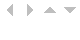

In [28]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup)

In [29]:
company = soup.find_all('div', class_='company')
print(company)

[<div class="row company small no-margin-top list-filter-show" data-label="">
<div class="col-md-5 col-xs-12 company-text">
<div class="rank large">
                                1                            </div>
<a class="link h5" href="http://www.greatplacetowork.com/certified-company/1000064" title="Cisco">
                                Cisco                            </a>
<ul class="industry fa-ul">
<li><i aria-hidden="true" class="fa-li fa fa-building-o"></i>Information Technology</li>
</ul>
<ul class="location fa-ul">
<li><i aria-hidden="true" class="fa-li fa fa-map-marker"></i>San Jose, CA, US</li>
</ul>
<ul class="review-link fa-ul">
<li><i aria-hidden="true" class="fa-li fa fa-file"></i><a class="review-link" href="http://www.greatplacetowork.com/certified-company/1000064" title="View Company Profile for Cisco">View Company Profile</a></li>
</ul>
<div class="quote-title uppercase margin-top-medium no-margin-bottom weight-bold small">What employees are saying</div>
<div 

In [30]:
Company_Type = []
for Type in soup.find_all('ul',class_='industry'):
    Type=Type.text
    Type = Type.replace('\n', '')
    Company_Type.append(Type)


In [31]:
Company_rank = []
for rank in soup.find_all('div', class_='rank'):
    ranks = rank.text
    ranks = ranks.replace('\n', '')
    Company_rank.append(ranks)

In [32]:
#for title in soup.find_all('a',attrs={"class":"link h5"}):
   # print({title})
Company_Name = []
for title in soup.find_all('a',class_='link h5'):
    title=title.text
    title = title.replace('\n', '')
    Company_Name.append(title)


In [33]:
Greatest_DB= pd.DataFrame({"Company Rank":Company_rank, 'Company Name':Company_Name, 'Company Type': Company_Type})
Greatest_DB.head(2)

,Company Rank,Company Name,Company Type
0,1 ...,Cisco ...,Information Technology
1,2 ...,Salesforce ...,Information Technology


Text(0, 0.5, 'Company Name')

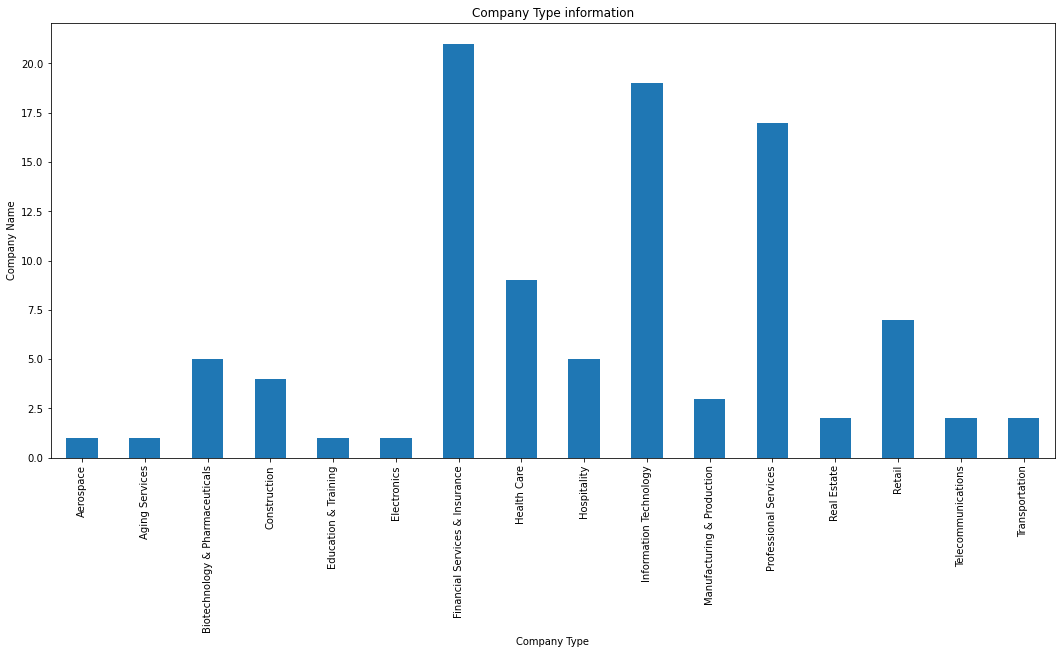

In [34]:
#what Type of companies are part of the 100 greatplacetowork 
Company_Type = Greatest_DB.groupby("Company Type").count()
Company_Type["Company Name"].plot(figsize = (18,8), kind = "bar")
plt.title("Company Type information")
plt.ylabel("Company Name")

In [35]:
#merging to see if any of the companies posting in github are part of the 100 Greatest places 
df_inner = pd.merge(Greatest_DB, Company_json, on='Company Name', how='inner')
df_inner

,Company Rank,Company Name,Company Type,id,Type,Application URL,created_at,Company URL,Location,Title,Description,how_to_apply,Company_logo,Weekday,Month,date,hour,zone,year


In [36]:
#merging to see if any of the companies in the CSV are part of the 100 Greatest places 
df_inner_CSV = pd.merge(Greatest_DB, company_CSV, on='Company Name', how='inner')
df_inner_CSV

,Company Rank,Company Name,Company Type,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue


In [37]:
#merging to see if any of the companies in the CSV are part of the 100 Greatest places 
df_inner_Json = pd.merge(company_CSV, CompanyGit, on='Company Name', how='inner')
df_inner_Json

,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Location,Company URL,Company_logo
0,Bosch Group,"Farmington Hills, MI",10000+ employees,1886,Company - Private,Miscellaneous Manufacturing,Manufacturing,$10+ billion (USD),"Sofia, Bulgaria",https://vonq.io/327uJSg,https://jobs.github.com/rails/active_storage/b...


In [38]:
#Renaming columns for post gress 
PG_Job_Posting_Job = pd.DataFrame(Job_Posting_Job)
PG_Job_Posting_comp = pd.DataFrame(Job_Posting_comp)
PG_company_CSV = pd.DataFrame(company_CSV)
PG_company_compe = pd.DataFrame(company_compe)
PG_CompanyGit =pd.DataFrame (CompanyGit)
PG_ApplicationGit = pd.DataFrame(ApplicationGit)
PG_ApplicationGit_app = pd.DataFrame(ApplicationGit_app)
PG_ApplicationGitTime = pd.DataFrame(ApplicationGitTime)
PG_Greatest_DB = pd.DataFrame(Greatest_DB)

In [39]:
PG_Job_Posting_Job.rename(columns={'Job Description':'Job_Description', }, inplace=True)
Job_Posting_comp.rename(columns={'Job Title':'Job_Title', 'Company Name':'Company_Name'}, inplace=True)
PG_company_CSV.rename(columns={'Type of ownership':'Type_of_ownership', 'Company Name':'Company_Name'}, inplace=True)
PG_company_compe.rename(columns={'Company Name':'Company_Name', 'Easy Apply':'Easy_Apply'}, inplace=True)
PG_ApplicationGit.rename(columns={'Company Name':'Company_Name','Application URL':'Application_URL'}, inplace=True)
PG_ApplicationGitTime.rename(columns={'Company Name':'Company_Name'}, inplace=True)
PG_Greatest_DB.rename(columns={"Company Rank":"Company_rank", 'Company Name':'Company_Name', 'Company Type': 'Company_Type'}, inplace=True)

In [40]:
MB_connection_string= 'postgres:@localhost:5432/Job_Application'
engine = create_engine(f'postgresql://{MB_connection_string}')

In [42]:
PG_Job_Posting_Job.to_sql(name ='DA_Job_Posting_Job',con=engine, if_exists='append',index=True )

In [ ]:
PG_Job_Posting_comp.to_sql(name ='DA_Job_Posting_comp',con=engine, if_exists='append',index=True )
PG_company_CSV.to_sql(name ='DA_company_info',con=engine, if_exists='append',index=True )
PG_company_compe.to_sql(name ='DA_company_compe',con=engine, if_exists='append',index=True )
PG_CompanyGit.to_sql(name ='Git_Company_info',con=engine, if_exists='append',index=True )
PG_ApplicationGit.to_sql(name ='Git_Application',con=engine, if_exists='append',index=True )
PG_ApplicationGit_app.to_sql(name ='Git_Application_detail',con=engine, if_exists='append',index=True )
PG_ApplicationGitTime.to_sql(name ='Git_ApplicationGitTime',con=engine, if_exists='append',index=True )
PG_Greatest_DB.to_sql(name ='great_Greatest_DB',con=engine, if_exists='append',index=True )

In [ ]:
engine.table_names()

In [ ]:
pd.read_sql_query('select * from "DA_Job_Posting_Job"', con=engine).head()

In [ ]:
pd.read_sql_query('select * from "Git_ApplicationGitTime"', con=engine).head()